<div style="text-align: center;">
    <h1>Loan Eligibility</h1>
</div>

<p style="font-size: 18px;"><b>Problem Statement</b></p>
<p>The company wants to automate the loan eligibility process (real-time) based on customer details provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically.</p>

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style

#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [37]:
#pip install plotly

**Reading Datasets from csv files**

In [38]:
df_loan_data = pd.read_csv('loan_sanction_train.csv')
df_test_data = pd.read_csv('loan_sanction_test.csv')

In [39]:
df_loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
# df_test_data.head()

In [41]:
df_loan_data.shape

(614, 13)

In [42]:
df_loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [44]:
df_loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
df_loan_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [46]:
df_loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [47]:
df_loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [48]:
df_loan_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [49]:
df_loan_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [50]:
df_loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [51]:
df_loan_data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [52]:
df_loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [53]:
continous=['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

**EDA(Exploratory Data Analysis) for Continous variables**

In [54]:
df_loan_data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


**Analysis - Impact of Gender, Education, Self Employed and Credit History on Loan Status**

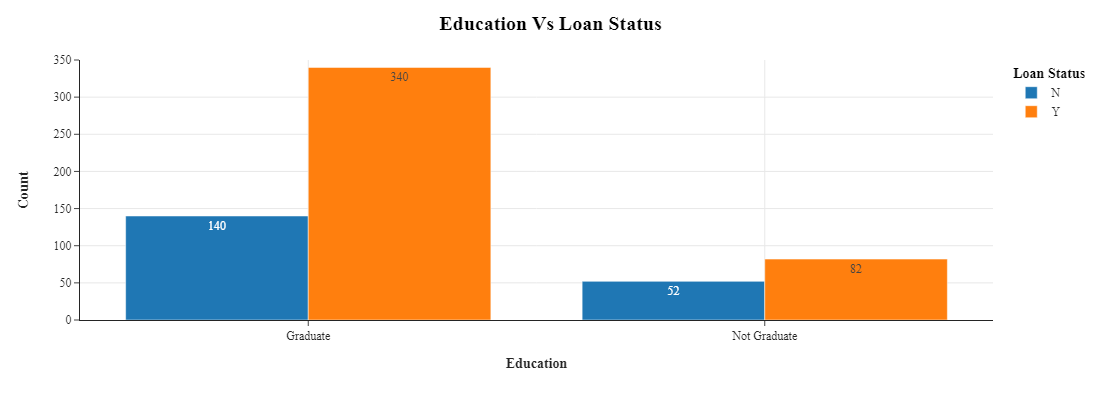

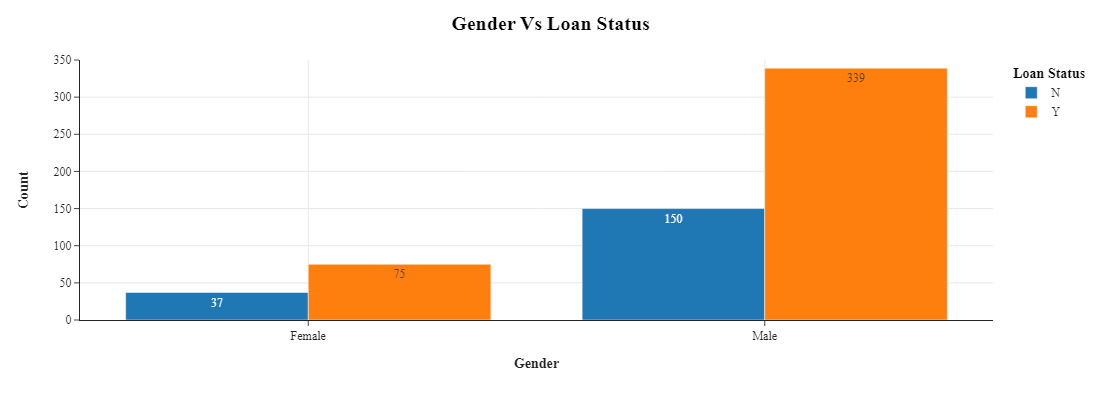

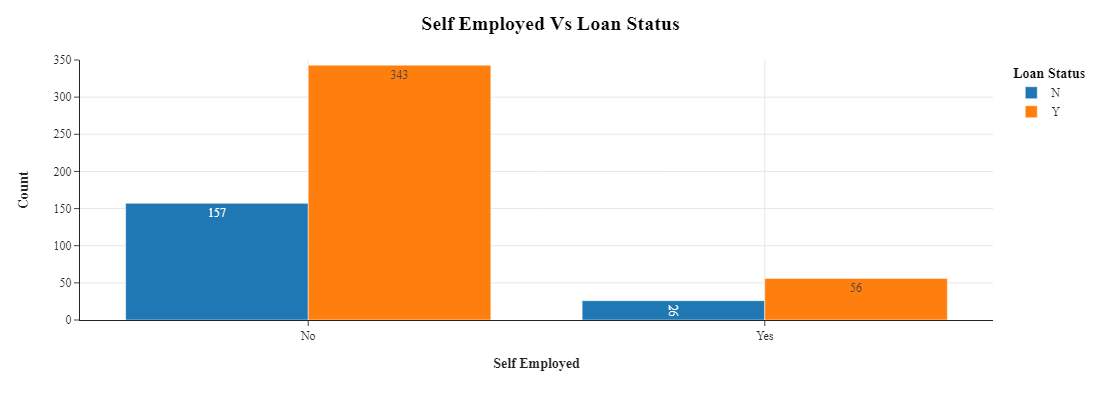

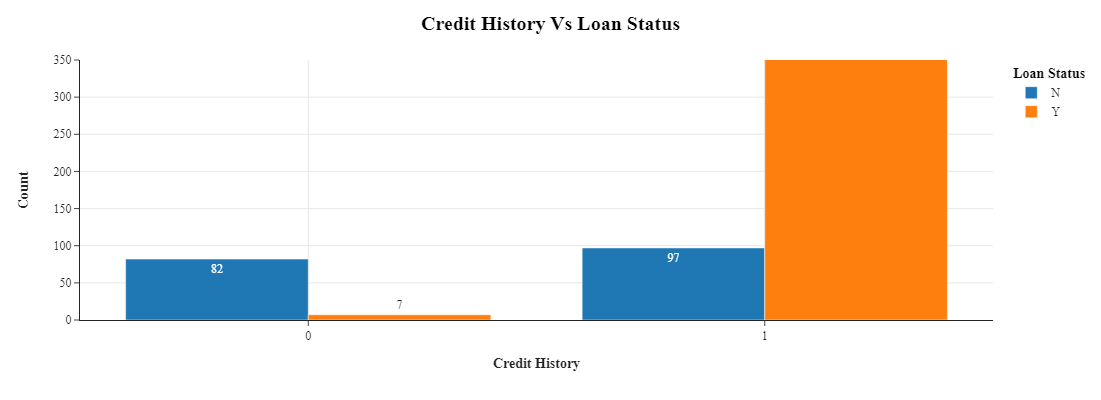

In [55]:
Education_loan_data=df_loan_data[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Gender_loan_data=df_loan_data[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Self_Employed_loan_data=df_loan_data[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Credit_History_loan_data=df_loan_data[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()

for col in ['Education','Gender','Self_Employed','Credit_History']:
  print('\n\n')
  df=col+'_loan_data'
  df = pd.DataFrame(eval(df))
  col_label = col.replace("_", " " )
  fig1=px.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', text_auto=True, template='simple_white')

  fig1.update_layout(yaxis_range=[0,350])  
  fig1.update_yaxes(showgrid=True)
  fig1.update_xaxes(showgrid=True)   
    
  fig1.update_layout(height=400,width=800,
      title=f'<b>{col_label} Vs Loan Status</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      title_xanchor="center",
      title_x=0.5,
      xaxis_title=f"<b>{col_label}</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Status</b>',
      legend_title_font_color="#000000",
      plot_bgcolor ='#ffffff'
  )
  fig1.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.0;">  

<b>Observations</b>:  
- In the above plots we see the Loan approval and Rejection cases are nearly similar in the case of both Graduate and Non-Graduates. Similarly for Gender and Self-Employed. So, the features  <b style="color:#0392cf;">Gender, Education and Self_Employed</b>  do not have a significant impact on the Loan Status.

- For <b style="color:#f37736;">Credit_History</b> we can see the Loan approvals are more in the case of Applicants having Credit History. So, this feature has a significant impact on Loan Status

**Analysis - Impact of Property Area on Loan Approval**

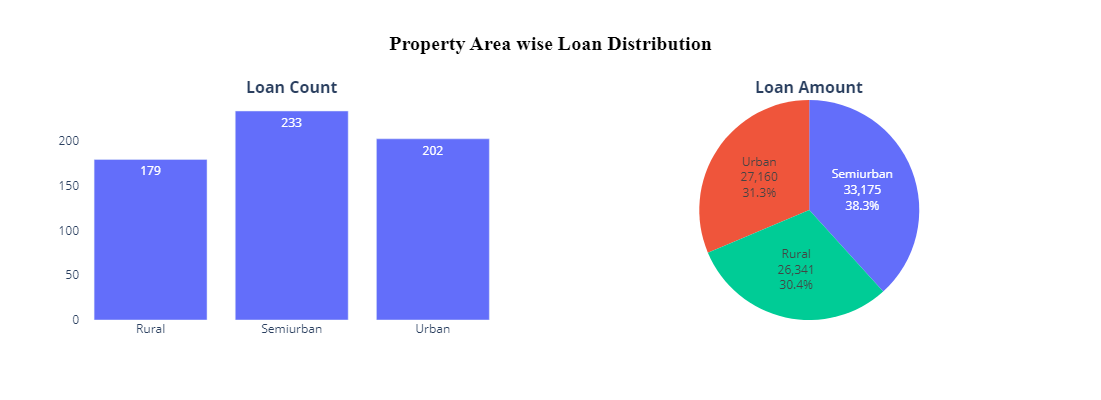

In [56]:
pa_loan_df = df_loan_data[['Property_Area', 'LoanAmount']].groupby(['Property_Area']).agg({'Property_Area':'count', 'LoanAmount':'sum'})
pa_loan_df.columns = [ 'Loan_Count', 'Loan_Amount']
pa_loan_df.reset_index(inplace=True)

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'xy'},{'type':'Domain'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=['<b>Loan Count</b>', '<b>Loan Amount</b>'])

fig.add_trace(go.Bar(x=pa_loan_df['Property_Area'],y=pa_loan_df['Loan_Count'], text=pa_loan_df['Loan_Count'] 
                     ),row=1,col=1)
fig.add_trace(go.Pie(labels=pa_loan_df['Property_Area'], values=pa_loan_df['Loan_Amount'],name='Loan_Amount', 
                     textinfo='percent+label+value'),row=1,col=2)

fig.update_layout(height=400,width=1000, 
                  title_text="<b>Property Area wise Loan Distribution</b>",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_family="Times New Roman",title_font_color="black",
                  title_font_size=20,
                  showlegend=False,
                  legend_bgcolor='#ffffff',
                  paper_bgcolor='#ffffff',
                  plot_bgcolor = '#ffffff')
fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.0;">  

<b>Observations</b>:  
- Highest number of loan were applied in <b style="color:#0392cf;">Semi-urban aera</b>, followed by <b style="color:#f37736;">Urban</b> and <b style="color:#f37736;">Rural area</b>.

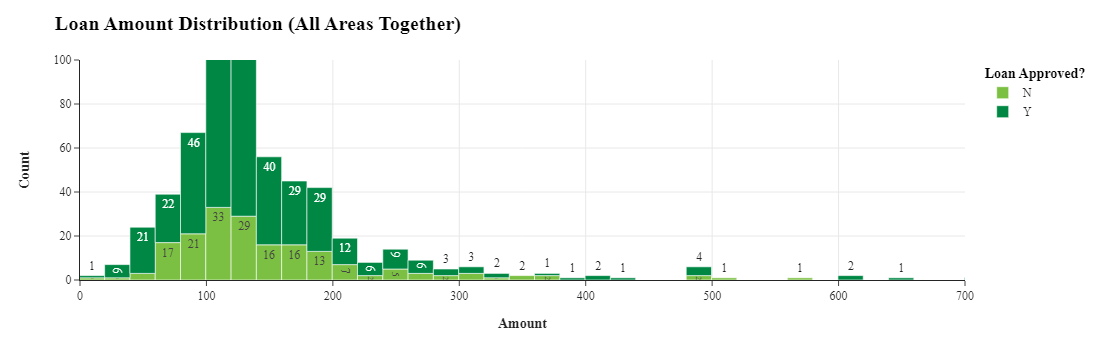

In [57]:
fig=px.histogram(df_loan_data.sort_values('Loan_Status', ascending=True), x='LoanAmount' , 
                 color='Loan_Status', nbins=50, text_auto=True, template='simple_white', 
                 color_discrete_sequence=['#7bc043','#008744'])
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True) 

fig.update_layout(bargap=0)
fig.update_layout(yaxis_range=[0,100])
fig.update_layout(xaxis_range=[0,700])

fig.update_layout(
    title='<b>Loan Amount Distribution (All Areas Together)</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Amount</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Loan Approved?</b>',
    legend_title_font_color='#000000',
    plot_bgcolor = '#ffffff'
)

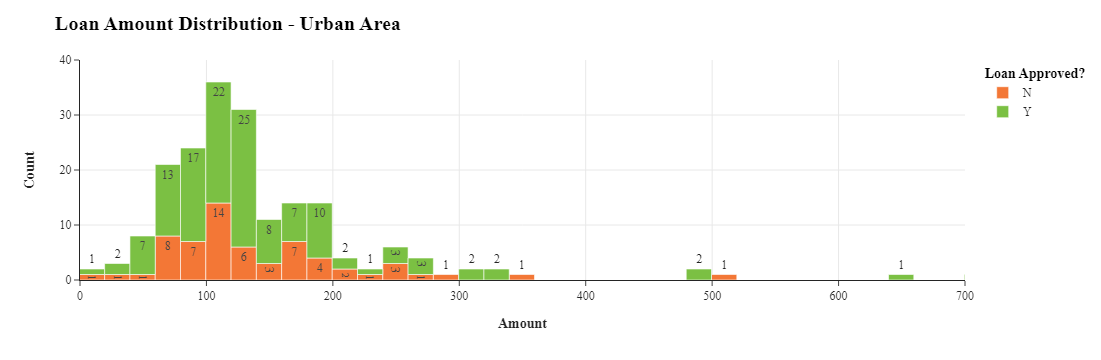

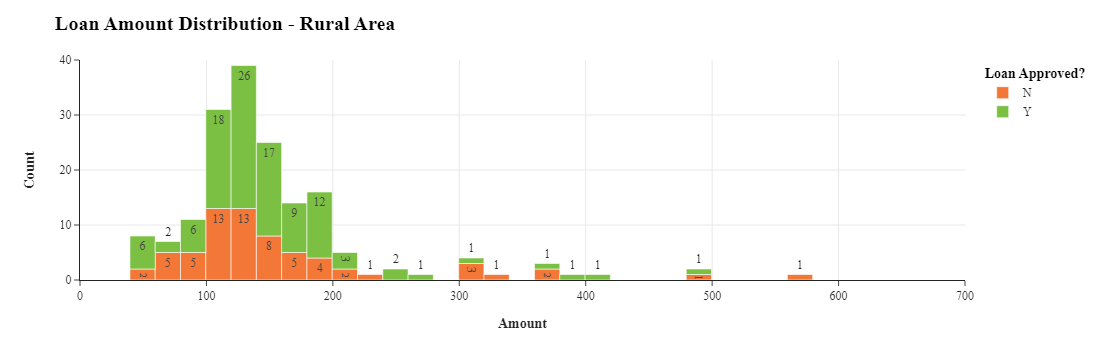

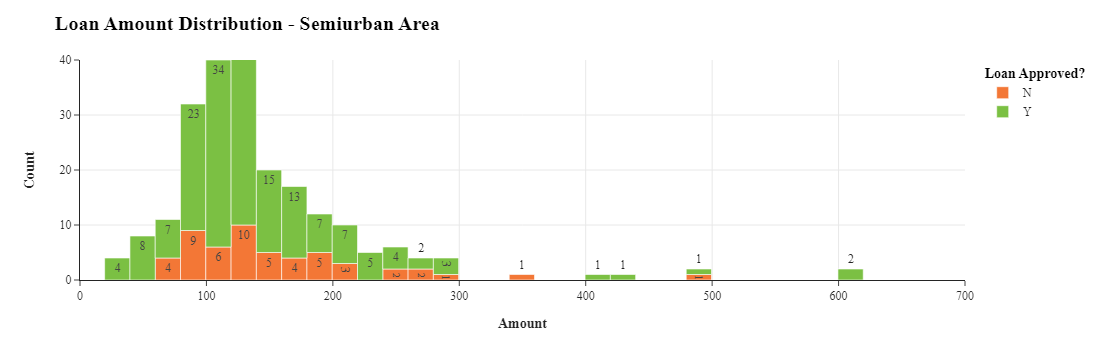

In [58]:
for area in ['Urban','Rural','Semiurban'] :
  bins=50
  if area == 'Urban':
    bins=40

  print('\n\n')
  fig=px.histogram(df_loan_data[df_loan_data['Property_Area']==area].sort_values('Loan_Status', ascending=True),
                   x='LoanAmount' , color='Loan_Status', nbins=bins, text_auto=True, 
                   template='simple_white', color_discrete_map ={'Y':'#7bc043', 'N':'#f37736'}) 
  fig.update_layout(bargap=0)
  fig.update_layout(yaxis_range=[0,40])
  fig.update_layout(xaxis_range=[0,700])


  fig.update_yaxes(showgrid=True)
  fig.update_xaxes(showgrid=True) 

  fig.update_layout(
      title=f'<b>Loan Amount Distribution - {area} Area</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      xaxis_title="<b>Amount</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Approved?</b>',
      legend_title_font_color='#000000',
      plot_bgcolor = '#ffffff'
  )
  fig.show()

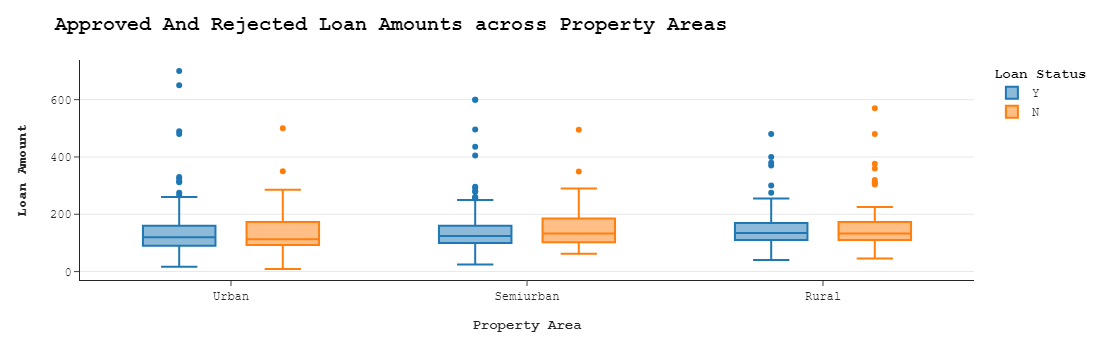

In [59]:
fig=px.box(data_frame=df_loan_data, 
              x='Property_Area',y='LoanAmount',template='simple_white',
              color = 'Loan_Status',
              category_orders={"Loan_Status"  : ['Y','N'],
                                "Property_Area" : ['Urban', 'Semiurban', 'Rural']}
              )
fig.update_yaxes(showgrid=True)

fig.update_layout(
    title='<b>Approved And Rejected Loan Amounts across Property Areas</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Property Area</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Loan Status</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)

fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>Observations</b>:  
- Highest number of loans were applied in <b style="color:#7bc043;">Semi-urban aera</b>, followed by <b style="color:#f37736;">Urban</b> and <b style="color:#f37736;">Rural area</b>.
- Partten of Loan Approval or Rejection is nearly <b style="color:#f37736;">same</b> in all of the three property areas.
- The property area has <b style="color:#7bc043;">little impact</b> on the Loan Approval chances.

**Analysis - Impact of Income on Loan Approval**

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>Observations</b>:
    
Financiers generally considers the Income of the applicant to asses the repayment capacity, before approving a loan request. If there are more than one applicant, then sum of their income will considered for assessing the repayment capacity. So, for our analysis purpose we shall sum up Applicant Income and Co-applicant Income to create a new feature called <b>'Total Income'</b>

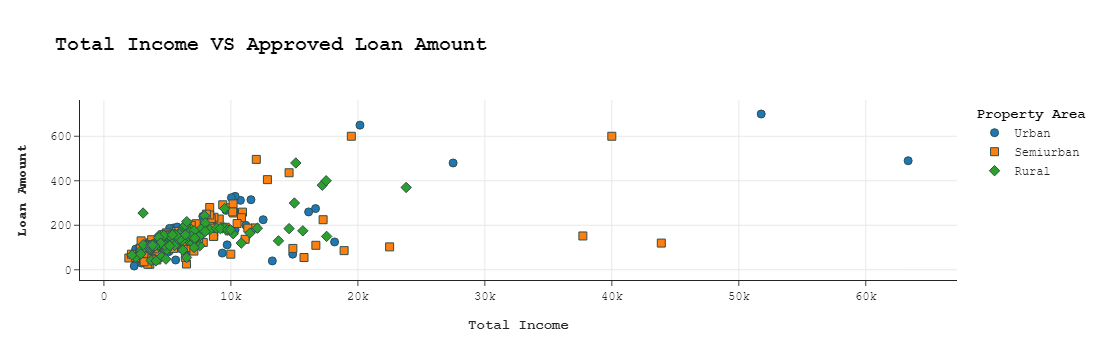

In [60]:
df_loan_data['Total_Income'] = df_loan_data['ApplicantIncome'] + df_loan_data['CoapplicantIncome']
df_loan_data = df_loan_data.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)

fig = px.scatter(df_loan_data[df_loan_data['Loan_Status']=='Y'], x="Total_Income", y="LoanAmount",  
                color="Property_Area",  template='simple_white',
                symbol = 'Property_Area', symbol_sequence=['circle', 'square', 'diamond', 'triangle-up'],
                 
                hover_name="Loan_Status",title='<b>Total Income VS Approved Loan Amount</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_traces(marker=dict(size=8,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Total Income</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Property Area</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)
fig.show()

<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>Observations</b>:  
- The approved loan amount is  <b style="color:#7bc043;">increasing</b> with increase in the  <b style="color:#7bc043;">Total Income</b> of the applicant(s).
- In  <b style="color:#0392cf;">Urban</b> and  <b style="color:#0392cf;">SemiUrban</b> area the approved loan amount is  <b style="color:#f37736;">linear</b> to the Total income. 
- In  <b style="color:#f37736;">Rural areas</b>, the increase is  <b style="color:#7bc043;">not</b> as linear as SemiUrban and Urban areas. In majority of the cases, the Approved loan amount is below 200

<a id="4.4"></a>
### <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> Analysis - Impact of Loan Term on Loan Approval</div>

In [62]:
import pandas as pd

# Assuming df_loan_data is your DataFrame

# Check for non-finite values (NaN or inf) in the 'Loan_Amount_Term' column
non_finite_values = df_loan_data['Loan_Amount_Term'][~df_loan_data['Loan_Amount_Term'].isin([pd.NA, pd.NA, float('inf'), float('-inf')])]

# Fill non-finite values with a default integer value, for example -1
df_loan_data['Loan_Amount_Term'].fillna(-1, inplace=True)

# Convert 'Loan_Amount_Term' column to integer data type
df_loan_data['Loan_Amount_Term'] = df_loan_data['Loan_Amount_Term'].astype(int)

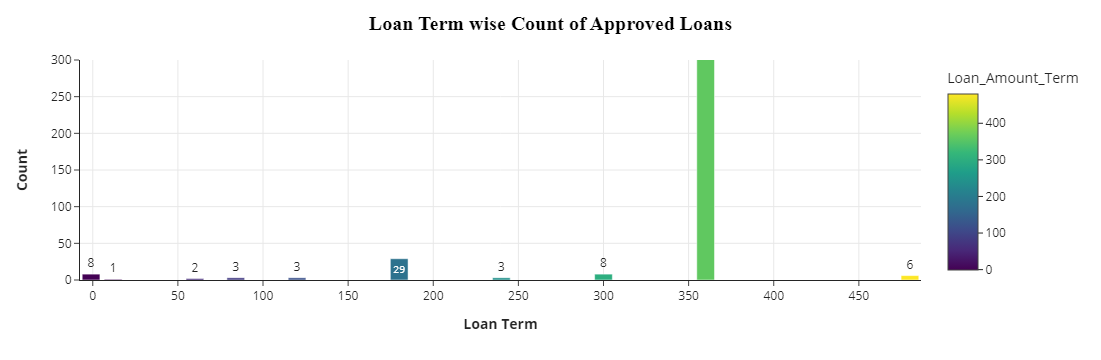

In [64]:
df_loan_data['Loan_Amount_Term'] = df_loan_data['Loan_Amount_Term'].astype(int)
loan_data2 = df_loan_data[df_loan_data['Loan_Status']=='Y'][['Loan_Amount_Term']].groupby('Loan_Amount_Term')\
.agg(Count=('Loan_Amount_Term', 'count')).reset_index()
loan_data2['Loan_Amount_Term'] = loan_data2['Loan_Amount_Term'].astype(int)

fig=px.bar(data_frame=loan_data2, x='Loan_Amount_Term', y='Count', template='simple_white', 
           color = 'Loan_Amount_Term', text_auto='True')

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(yaxis_range=[0,300])

fig.update_layout(title_text="<b>Loan Term wise Count of Approved Loans</b>",
                  title_font_family="Times New Roman",title_font_color="#000000",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Count</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')
fig.show()

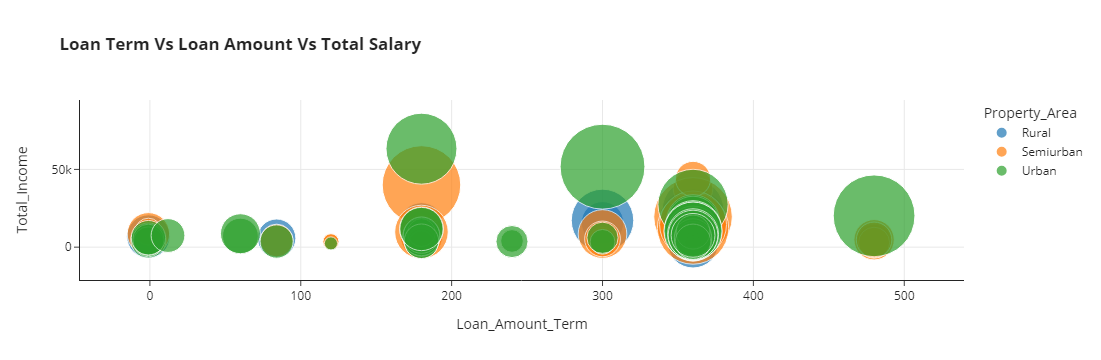

In [69]:
import pandas as pd
import plotly.express as px

# Assuming loan_data3 is the DataFrame

# Drop rows with NaN values in the 'size' column
loan_data3.dropna(subset=['LoanAmount'], inplace=True)

# Create the scatter plot
fig = px.scatter(loan_data3, x="Loan_Amount_Term", y="Total_Income", size="LoanAmount", color="Property_Area", 
                 template='simple_white', hover_name="LoanAmount", size_max=60,
                 title='<b> Loan Term Vs Loan Amount Vs Total Salary</b>')

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)

fig.show()


<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  
<b>Observations</b>: 
    
- Majority of the approved loans are having  <b style="color:#f37736;">Term 360</b>, followed by  <b style="color:#0392cf;">Term 180</b>
- The approved loan amount is increasing with increase in salary, but the majority of the loans are having  <b style="color:#0392cf;">180</b> and  <b style="color:#f37736;">360</b> as Term

<a id="5"></a>
# <div style="text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 0.5;"> ML Model</div>

In [70]:
import pandas as pd
import numpy as np
import random

# Load the existing dataset
loan_df = pd.read_csv("loan_sanction_train.csv")

# Function to generate Nigerian names
def generate_nigerian_name():
    first_names = ["Olumide", "Chinedu", "Obinna", "Chioma", "Ngozi", "Ayodele", "Adesua", "Babatunde", "Folake", "Kehinde",
                   "Oluwafemi", "Nkechi", "Tunde", "Aminat", "Omotola", "Oluwakemi", "Chinwe", "Olufemi", "Ibrahim", "Yewande"]
    last_names = ["Okafor", "Ogunlesi", "Adeyemi", "Okonkwo", "Eze", "Adebayo", "Adewale", "Nwachukwu", "Osagie", "Omotayo",
                  "Olawale", "Adegoke", "Oladimeji", "Ogunleye", "Oni", "Oluwole", "Obi", "Ojo", "Okeke", "Onwuachi"]
    return random.choice(first_names) + " " + random.choice(last_names)

# Function to generate NIN
def generate_nin():
    return ''.join(random.choices('0123456789', k=11))

# Generating Nigerian names and NINs for the new dataset
loan_df['Nigerian_Name'] = [generate_nigerian_name() for _ in range(len(loan_df))]
loan_df['NIN'] = [generate_nin() for _ in range(len(loan_df))]

# Creating an extended dataset by replicating existing records and modifying Loan_Status
extended_loan_df = loan_df.copy()
extended_loan_df['Loan_Status'] = np.random.choice(['Y', 'N'], size=len(extended_loan_df))

# Splitting the extended dataset into training and testing datasets
train_df = extended_loan_df.sample(frac=0.8, random_state=42)
test_df = extended_loan_df.drop(train_df.index)

# Saving the training and testing datasets
train_df.to_csv("train_loan_dataset.csv", index=False)
test_df.to_csv("test_loan_dataset.csv", index=False)

# Displaying the first few rows of the training dataset
print("Training Dataset:")
print(train_df.head())

# Displaying the first few rows of the testing dataset
print("\nTesting Dataset:")
print(test_df.head())

Training Dataset:
      Loan_ID  Gender Married Dependents Education Self_Employed  \
350  LP002139    Male     Yes          0  Graduate            No   
377  LP002223    Male     Yes          0  Graduate            No   
163  LP001570    Male     Yes          2  Graduate            No   
609  LP002978  Female      No          0  Graduate            No   
132  LP001478    Male      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
350             9083                0.0       228.0             360.0   
377             4310                0.0       130.0             360.0   
163             4167             1447.0       158.0             360.0   
609             2900                0.0        71.0             360.0   
132             2718                0.0        70.0             360.0   

     Credit_History Property_Area Loan_Status    Nigerian_Name          NIN  
350             1.0     Semiurban           Y   Chinedu 

In [71]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv("train_loan_dataset.csv")

# Clean the 'Dependents' column by replacing '3+' with '3'
train_df['Dependents'] = train_df['Dependents'].replace('3+', '3')

# Clean the 'Self_Employed' column by replacing missing values with 'No'
train_df['Self_Employed'].fillna('No', inplace=True)

# Clean the 'LoanAmount' column by replacing missing values with 0
train_df['LoanAmount'].fillna(0, inplace=True)

# Display the cleaned training dataset
print("Cleaned Training Dataset:")
print(train_df.head())

# Save the cleaned training dataset
train_df.to_csv("cleaned_train_loan_dataset.csv", index=False)

Cleaned Training Dataset:
    Loan_ID  Gender Married Dependents Education Self_Employed  \
0  LP002139    Male     Yes          0  Graduate            No   
1  LP002223    Male     Yes          0  Graduate            No   
2  LP001570    Male     Yes          2  Graduate            No   
3  LP002978  Female      No          0  Graduate            No   
4  LP001478    Male      No          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             9083                0.0       228.0             360.0   
1             4310                0.0       130.0             360.0   
2             4167             1447.0       158.0             360.0   
3             2900                0.0        71.0             360.0   
4             2718                0.0        70.0             360.0   

   Credit_History Property_Area Loan_Status    Nigerian_Name          NIN  
0             1.0     Semiurban           Y   Chinedu Osagie  36250500497 

In [72]:
# Load the testing dataset
test_df = pd.read_csv("test_loan_dataset.csv")

# Clean the 'Dependents' column by replacing '3+' with '3'
test_df['Dependents'] = test_df['Dependents'].replace('3+', '3')

# Clean the 'Self_Employed' column by replacing missing values with 'No'
test_df['Self_Employed'].fillna('No', inplace=True)

# Clean the 'LoanAmount' column by replacing missing values with 0
test_df['LoanAmount'].fillna(0, inplace=True)

# Display the cleaned testing dataset
print("\nCleaned Testing Dataset:")
print(test_df.head())

# Save the cleaned testing dataset
test_df.to_csv("cleaned_test_loan_dataset.csv", index=False)


Cleaned Testing Dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001008   Male      No          0      Graduate            No   
2  LP001029   Male      No          0      Graduate            No   
3  LP001030   Male     Yes          2      Graduate            No   
4  LP001043   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             6000                0.0       141.0             360.0   
2             1853             2840.0       114.0             360.0   
3             1299             1086.0        17.0             120.0   
4             7660                0.0       104.0             360.0   

   Credit_History Property_Area Loan_Status      Nigerian_Name          NIN  
0             1.0         Rural           N    Ibrahim

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle

# Load datasets
train_df = pd.read_csv('cleaned_train_loan_dataset.csv')
test_df = pd.read_csv('cleaned_test_loan_dataset.csv')

# Preprocessing
# Define categorical and numerical features
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale data
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Separate target from predictors
X_train = train_df.drop(['Loan_Status', 'Loan_ID', 'Dependents', 'Nigerian_Name', 'NIN'], axis=1)
y_train = train_df['Loan_Status']
X_test = test_df.drop(['Loan_Status', 'Loan_ID', 'Dependents', 'Nigerian_Name', 'NIN'], axis=1)
y_test = test_df['Loan_Status']

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred = pipeline.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, pos_label='Y'))
print("Recall:", recall_score(y_val, y_pred, pos_label='Y'))
print("F1 Score:", f1_score(y_val, y_pred, pos_label='Y'))


# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=pipeline.classes_)
print("Confusion Matrix:\n", cm)

# Optionally, predict on the test dataset and evaluate
y_test_pred = pipeline.predict(X_test)
# Evaluate the test predictions...

# Saving the model to a file
filename = 'loan_eligibility_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model saved to {filename}")

Accuracy: 0.5151515151515151
Precision: 0.5
Recall: 0.5416666666666666
F1 Score: 0.52
Confusion Matrix:
 [[25 26]
 [22 26]]
Model saved to loan_eligibility_model.pkl


In [74]:
import pandas as pd

# Load the CSV file
csv_file_path = 'cleaned_train_loan_dataset.csv'
df = pd.read_csv(csv_file_path)

# Convert DataFrame to JSON
# Assuming 'NIN' is the column you want to use as keys
json_str = df.set_index('NIN').to_json(orient='index')

# Print the JSON string
print(json_str)

# If you need to write this JSON to a file:
json_file_path = 'users_data.json'
with open(json_file_path, 'w') as json_file:
    json_file.write(json_str)

# To use this JSON string as a Python dictionary:
import json
users_data = json.loads(json_str)

# Printing the dictionary to check its format
print(users_data)

{"36250500497":{"Loan_ID":"LP002139","Gender":"Male","Married":"Yes","Dependents":0.0,"Education":"Graduate","Self_Employed":"No","ApplicantIncome":9083,"CoapplicantIncome":0.0,"LoanAmount":228.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Semiurban","Loan_Status":"Y","Nigerian_Name":"Chinedu Osagie"},"48640249612":{"Loan_ID":"LP002223","Gender":"Male","Married":"Yes","Dependents":0.0,"Education":"Graduate","Self_Employed":"No","ApplicantIncome":4310,"CoapplicantIncome":0.0,"LoanAmount":130.0,"Loan_Amount_Term":360.0,"Credit_History":null,"Property_Area":"Semiurban","Loan_Status":"Y","Nigerian_Name":"Chioma Eze"},"49931421877":{"Loan_ID":"LP001570","Gender":"Male","Married":"Yes","Dependents":2.0,"Education":"Graduate","Self_Employed":"No","ApplicantIncome":4167,"CoapplicantIncome":1447.0,"LoanAmount":158.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Rural","Loan_Status":"Y","Nigerian_Name":"Nkechi Adebayo"},"32968334077":{"Loan_ID":"LP002978","Gen

In [75]:
#pip freeze > requirements.txt

<a id="6"></a>
<div style="font-size: 18px;text-align: left; background-color: #ffffff;  color: black; border:black; border-width:1.5px; border-style:solid; font-family: Times New Roman; padding: 14px; line-height: 1.5;">  

<b>📌Conclusion</b>:  
- The Loan approval and Rejection pattern are nearly the same in all of the three Property Areas(Urban, Semi-Urban and Rural Areas).
- Chances of loan approval for higher amounts increase with an increase in the total income of the applicant(s). 
- Credit History has a significant impact on loan approval
- Features Loan_ID, Gender, Married, Dependents, Education, Self_Employed and Property Area have little impact on loan approval.
- Majority of the loans were approved where the Term is 180 or 360